In [1]:
#importing modules and libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

import tensorflow as tf
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df = pd.read_csv('iris.data', names = columns)

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#basic statistical analysis
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#rows x columns
df.shape

(150, 5)

In [6]:
#column(feature) name
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

In [7]:
#feature type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

Sepal Length    0.0
Sepal Width     0.0
Petal Length    0.0
Petal Width     0.0
Species         0.0
dtype: float64

In [9]:
#dataset type
type(df)

pandas.core.frame.DataFrame

In [10]:
#groupby size
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
#categorize the features depending on their datatype

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 1
Integer variables: 0
Float variables: 4


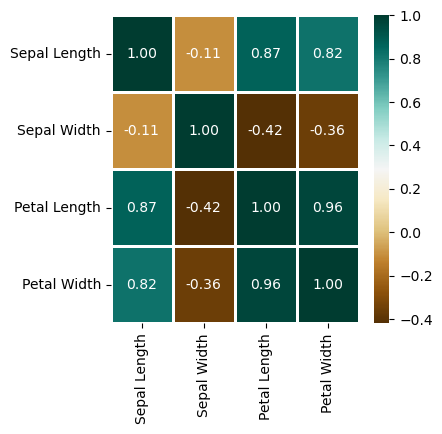

In [12]:
#heatmap

plt.figure(figsize=(4, 4))
sns.heatmap(df.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True);

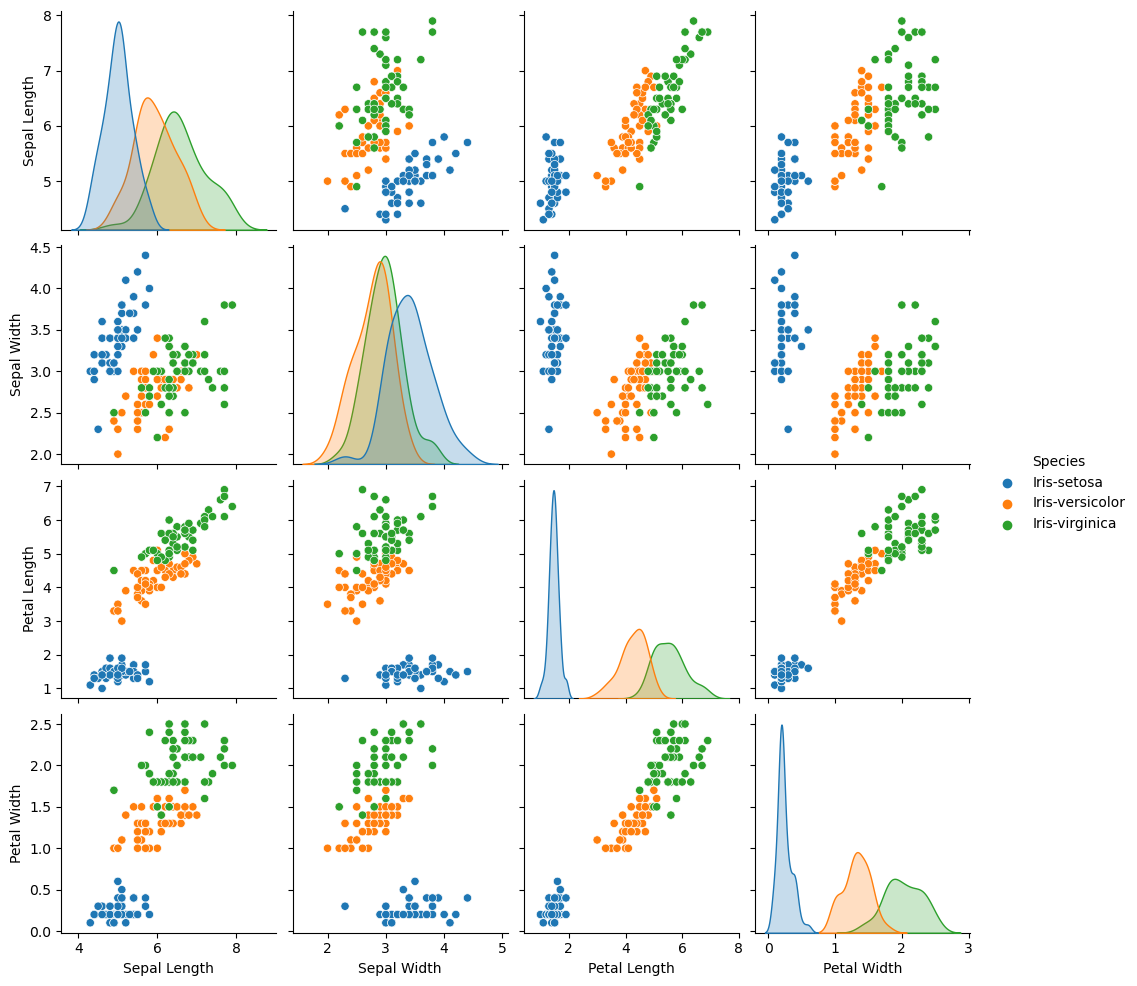

In [13]:
#visualize entire dataset
sns.pairplot(df, hue='Species');

In [14]:
#separate features and target
data = df.values
X = data[:,0:4]#(features)
Y = data[:,4]#(target)

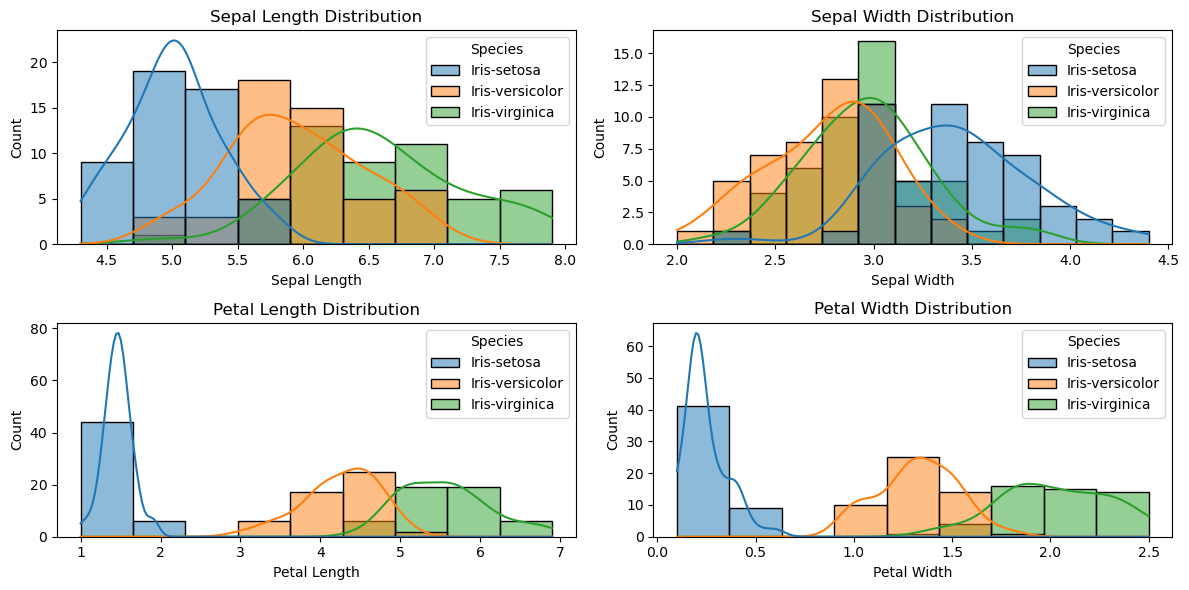

In [15]:
features = df.columns[:-1]
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Species', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)#scaling X

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(Y)#encoding Y

In [17]:
#calculating average of some columns using y
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
#reshaping to 4x3 matrix
Y_Data_reshaped = Y_Data.reshape(4, 3)
#changing 4x3 to 3x4 matrix
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
#x axis
X_axis = np.arange(len(columns)-1)
#setting width for bar graph
width = 0.25

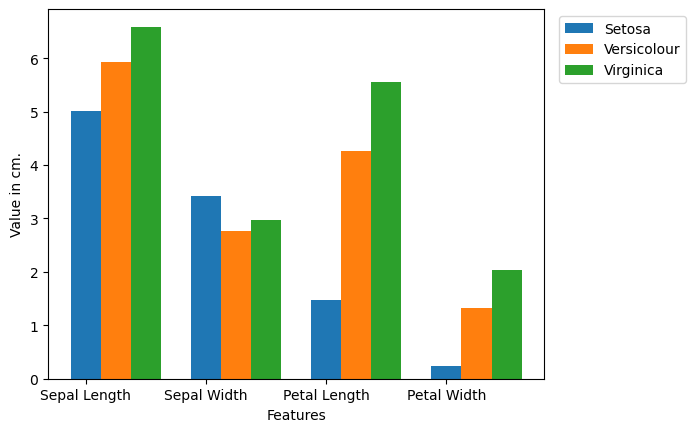

In [18]:
#bar plot
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
#labeling
plt.xlabel("Features")
plt.ylabel("Value in cm.")
#legend
plt.legend(bbox_to_anchor=(1.3,1))
#display
plt.show()

In [19]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [20]:
#intialize a model using support vector classifier and fit the model to a training data
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [21]:
#predicted variables are stored in predictions
predictions = svn.predict(X_test)

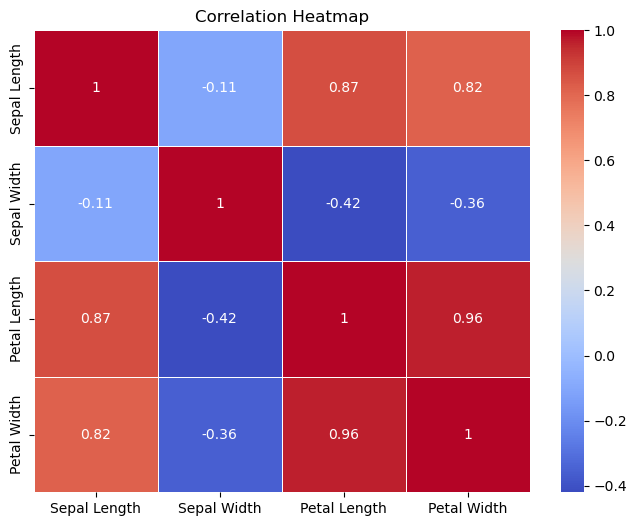

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

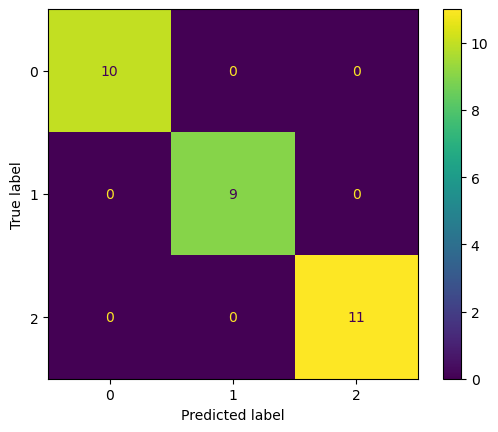

In [23]:
cm=confusion_matrix(y_test,predictions)
d=ConfusionMatrixDisplay(confusion_matrix=cm)
d.plot()
plt.show()

In [24]:
#Logistic Regression
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
accuracy_score(y_test, predictions)

1.0

In [26]:
#evaluation metrices
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
#model using tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])
# 3 classes, hence 3 output neurons with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
#make predictions on test data
model.predict(X_test)

1/1 [==============================] - 0s 412ms/step


array([[0.34722316, 0.3314888 , 0.32128805],
       [0.37319866, 0.3117589 , 0.31504244],
       [0.4290957 , 0.19171219, 0.3791921 ],
       [0.34461486, 0.32097128, 0.33441386],
       [0.36837777, 0.28053918, 0.35108304],
       [0.40476143, 0.24018389, 0.35505462],
       [0.32370394, 0.3528909 , 0.32340512],
       [0.3913355 , 0.24552447, 0.36314005],
       [0.30284092, 0.39055747, 0.3066016 ],
       [0.30475894, 0.38685426, 0.3083868 ],
       [0.38271147, 0.25798145, 0.3593071 ],
       [0.27752694, 0.4540873 , 0.26838577],
       [0.41466385, 0.24058826, 0.34474787],
       [0.29186916, 0.427618  , 0.28051284],
       [0.3306162 , 0.3644413 , 0.30494246],
       [0.37047663, 0.27630505, 0.3532184 ],
       [0.38794422, 0.25182638, 0.36022943],
       [0.269173  , 0.45648503, 0.274342  ],
       [0.30717295, 0.3828665 , 0.3099605 ],
       [0.36908442, 0.28434628, 0.34656933],
       [0.2806385 , 0.44744608, 0.27191553],
       [0.35623556, 0.30102324, 0.34274116],
       [0.

In [30]:
#predicting X_train
training_prediction = l_reg.predict(X_train)
training_prediction

array([-0.13469134, -0.07522241,  1.17702637,  0.00705787, -0.01033731,
        1.68751219,  1.28487263, -0.07013434, -0.07911796, -0.1638235 ,
        1.75669736,  1.37236716,  1.30774959, -0.05934912, -0.10578729,
        0.96206647,  1.47364288,  1.70876213,  1.19485284,  2.12166644,
        1.19816231,  2.02149591,  1.38873416, -0.08402768,  1.99336711,
        1.00963281, -0.0889374 , -0.04298212,  0.1327822 ,  0.99421759,
        1.59439509,  0.0828422 ,  0.01015519,  0.16949011,  1.22244716,
       -0.05230786,  1.13676503,  2.03866114, -0.00781206,  1.16658326,
        1.81065968, -0.17470871,  1.58386281,  1.75669736,  0.99392706,
        1.41147036,  1.96155627,  1.20912588,  0.04169665,  0.92431957,
        1.73901166, -0.05974283, -0.10380733,  1.04226682,  1.4998701 ,
       -0.06513544,  2.0249335 , -0.04093976,  0.19761891,  1.58231415,
        0.87918929,  1.97068067,  1.56914446,  1.58066414,  1.99369841,
        1.19620913,  0.03429927, -0.09151424,  1.521236  ,  1.73

In [31]:
#predicting X_test
test_prediction = l_reg.predict(X_test)
test_prediction

array([ 1.2305166 , -0.04088817,  2.22162345,  1.34972015,  1.28607917,
        0.02346565,  1.05796175,  1.82557039,  1.37219259,  1.06898774,
        1.6997677 , -0.0725704 , -0.15476151, -0.06513544, -0.02320247,
        1.39524413,  1.99939235,  1.04970178,  1.28040501,  1.97315432,
        0.03134273,  1.59775615,  0.09419949,  1.91821542,  1.83026281,
        1.88002641,  1.78919243,  2.03257165,  0.0373074 ,  0.02643301])